In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
# import sklearn

import os

In [2]:
demand_total = pd.read_csv('data/demand_total.csv', index_col='datetime_utc')
demand_total.index = pd.to_datetime(demand_total.index)
demand_total.head()

,value,datetime,tz_time,geo_id,geo_name
datetime_utc,,,,,
2021-12-31 23:00:00+00:00,20955.3,2022-01-01T00:00:00.000+01:00,2021-12-31T23:00:00.000Z,8741,Península
2022-01-01 00:00:00+00:00,20165.8,2022-01-01T01:00:00.000+01:00,2022-01-01T00:00:00.000Z,8741,Península
2022-01-01 01:00:00+00:00,18812.4,2022-01-01T02:00:00.000+01:00,2022-01-01T01:00:00.000Z,8741,Península
2022-01-01 02:00:00+00:00,17646.4,2022-01-01T03:00:00.000+01:00,2022-01-01T02:00:00.000Z,8741,Península
2022-01-01 03:00:00+00:00,17018.1,2022-01-01T04:00:00.000+01:00,2022-01-01T03:00:00.000Z,8741,Península


In [3]:
root = 'data'

df_dict = {}

for fn in os.listdir(root):
    name = os.path.splitext(fn)[0]
    df_dict[name] = pd.read_csv(os.path.join(root, fn), index_col='datetime_utc')
    df_dict[name].index = pd.to_datetime(df_dict[name].index)
    if(name in ['demand_total','gen_ccgt','gen_coal','gen_coal','gen_hydro','gen_nuclear','gen_solar_pv','gen_solar_th','gen_total','gen_wind']):
        df_dict[name].columns = df_dict[name].columns + '_' + name

df_dict['demand_total']

,value_demand_total,datetime_demand_total,tz_time_demand_total,geo_id_demand_total,geo_name_demand_total
datetime_utc,,,,,
2021-12-31 23:00:00+00:00,20955.3,2022-01-01T00:00:00.000+01:00,2021-12-31T23:00:00.000Z,8741,Península
2022-01-01 00:00:00+00:00,20165.8,2022-01-01T01:00:00.000+01:00,2022-01-01T00:00:00.000Z,8741,Península
2022-01-01 01:00:00+00:00,18812.4,2022-01-01T02:00:00.000+01:00,2022-01-01T01:00:00.000Z,8741,Península
2022-01-01 02:00:00+00:00,17646.4,2022-01-01T03:00:00.000+01:00,2022-01-01T02:00:00.000Z,8741,Península
2022-01-01 03:00:00+00:00,17018.1,2022-01-01T04:00:00.000+01:00,2022-01-01T03:00:00.000Z,8741,Península
...,...,...,...,...,...
2023-08-30 18:00:00+00:00,27748.0,2023-08-30T20:00:00.000+02:00,2023-08-30T18:00:00.000Z,8741,Península
2023-08-30 19:00:00+00:00,28143.0,2023-08-30T21:00:00.000+02:00,2023-08-30T19:00:00.000Z,8741,Península
2023-08-30 20:00:00+00:00,26787.3,2023-08-30T22:00:00.000+02:00,2023-08-30T20:00:00.000Z,8741,Península


In [4]:
for value in df_dict:
    if(value in ['demand_total','gen_ccgt','gen_coal','gen_coal','gen_hydro','gen_nuclear','gen_solar_pv','gen_solar_th','gen_total','gen_wind']):
        df_dict[value] = df_dict[value].drop(columns=list(df_dict[value].columns[1:]))
    else:
        df_dict[value] = df_dict[value].drop(columns=list(df_dict[value].columns[1:3]))

In [5]:
df_dict['demand_total'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14568 entries, 2021-12-31 23:00:00+00:00 to 2023-08-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   value_demand_total  14568 non-null  float64
dtypes: float64(1)
memory usage: 227.6 KB


In [6]:
pd.DatetimeIndex(df_dict['demand_total'].index)

DatetimeIndex(['2021-12-31 23:00:00+00:00', '2022-01-01 00:00:00+00:00',
               '2022-01-01 01:00:00+00:00', '2022-01-01 02:00:00+00:00',
               '2022-01-01 03:00:00+00:00', '2022-01-01 04:00:00+00:00',
               '2022-01-01 05:00:00+00:00', '2022-01-01 06:00:00+00:00',
               '2022-01-01 07:00:00+00:00', '2022-01-01 08:00:00+00:00',
               ...
               '2023-08-30 13:00:00+00:00', '2023-08-30 14:00:00+00:00',
               '2023-08-30 15:00:00+00:00', '2023-08-30 16:00:00+00:00',
               '2023-08-30 17:00:00+00:00', '2023-08-30 18:00:00+00:00',
               '2023-08-30 19:00:00+00:00', '2023-08-30 20:00:00+00:00',
               '2023-08-30 21:00:00+00:00', '2023-08-30 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime_utc', length=14568, freq=None)

In [7]:
df_dict['demand_total'].index.value_counts()

2022-10-30 00:00:00+00:00    2
2021-12-31 23:00:00+00:00    1
2023-02-09 07:00:00+00:00    1
2023-02-09 09:00:00+00:00    1
2023-02-09 10:00:00+00:00    1
                            ..
2022-07-22 10:00:00+00:00    1
2022-07-22 11:00:00+00:00    1
2022-07-22 12:00:00+00:00    1
2022-07-22 13:00:00+00:00    1
2023-08-30 22:00:00+00:00    1
Name: datetime_utc, Length: 14567, dtype: int64

In [8]:
df_dict['demand_total'].loc['2022-10-30 00:00:00+00:00']
# ??? tell your prof you have duplicate datetime_utc. 

,value_demand_total
datetime_utc,
2022-10-30 00:00:00+00:00,18327.3
2022-10-30 00:00:00+00:00,17581.2


In [9]:
df_dict['demand_total'] = df_dict['demand_total'][~df_dict['demand_total'].index.duplicated(keep='first')]

<AxesSubplot:xlabel='month', ylabel='value_demand_total'>

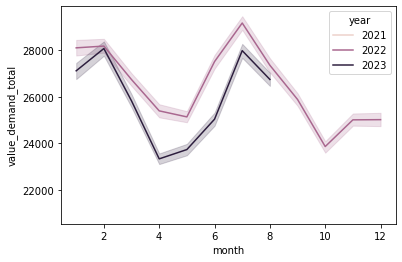

In [10]:
df_dict['demand_total']['month'] = pd.DatetimeIndex(df_dict['demand_total'].index).month
df_dict['demand_total']['year'] = pd.DatetimeIndex(df_dict['demand_total'].index).year

sns.lineplot(data = df_dict['demand_total'], x = 'month', y = 'value_demand_total', hue = 'year')

In [11]:
df_dict['demand_total'][df_dict['demand_total']['year'] == '2021']

,value_demand_total,month,year
datetime_utc,,,


In [12]:
df_dict['gen_total'].head()

,value_gen_total
datetime_utc,
2021-12-31 23:00:00+00:00,19553.3
2022-01-01 00:00:00+00:00,19307.5
2022-01-01 01:00:00+00:00,18964.5
2022-01-01 02:00:00+00:00,18545.9
2022-01-01 03:00:00+00:00,18385.3


In [13]:
df_dict['gen_total'].index.value_counts()

2022-10-30 00:00:00+00:00    2
2021-12-31 23:00:00+00:00    1
2023-02-09 07:00:00+00:00    1
2023-02-09 09:00:00+00:00    1
2023-02-09 10:00:00+00:00    1
                            ..
2022-07-22 10:00:00+00:00    1
2022-07-22 11:00:00+00:00    1
2022-07-22 12:00:00+00:00    1
2022-07-22 13:00:00+00:00    1
2023-08-30 22:00:00+00:00    1
Name: datetime_utc, Length: 14567, dtype: int64

In [14]:
df_dict['gen_total'] = df_dict['gen_total'][~df_dict['gen_total'].index.duplicated(keep='first')]

<AxesSubplot:xlabel='month', ylabel='value_gen_total'>

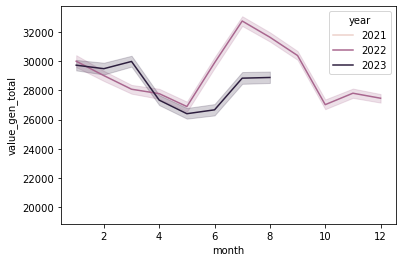

In [15]:
df_dict['gen_total']['month'] = pd.DatetimeIndex(df_dict['gen_total'].index).month
df_dict['gen_total']['year'] = pd.DatetimeIndex(df_dict['gen_total'].index).year

sns.lineplot(data = df_dict['gen_total'], x = 'month', y = 'value_gen_total', hue = 'year')

In [16]:
df = pd.DataFrame(columns=['datetime_utc'])
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
for value in ['demand_total','gen_solar_th','gen_ccgt','gen_coal']:
    df = pd.merge(df, df_dict[value], on='datetime_utc', how='outer', suffixes=['demand_total','gen_solar_th'])

df.head()

,datetime_utc,value_demand_total,month,year,value_gen_solar_th,value_gen_ccgt,value_gen_coal
0,2021-12-31 23:00:00+00:00,20955.3,12,2021,10.0,NaN,900.5
1,2022-01-01 00:00:00+00:00,20165.8,1,2022,10.0,NaN,852.5
2,2022-01-01 01:00:00+00:00,18812.4,1,2022,10.0,NaN,851.5
3,2022-01-01 02:00:00+00:00,17646.4,1,2022,10.0,NaN,851.5
4,2022-01-01 03:00:00+00:00,17018.1,1,2022,10.0,NaN,851.5


In [17]:
df_dict['spot_price_2022-01-01'].head()

,value,geo_id,geo_name
datetime_utc,,,
2021-12-31 23:00:00+00:00,145.86,1,Portugal
2021-12-31 23:00:00+00:00,89.06,2,Francia
2021-12-31 23:00:00+00:00,145.86,3,España
2021-12-31 23:00:00+00:00,138.19,8824,Reino Unido
2021-12-31 23:00:00+00:00,170.28,8825,Italia


In [18]:
df_dict['spot_price_2022-01-01'][df_dict['spot_price_2022-01-01']['geo_id'] == 3]

,value,geo_id,geo_name
datetime_utc,,,
2021-12-31 23:00:00+00:00,145.86,3,España
2022-01-01 00:00:00+00:00,114.90,3,España
2022-01-01 01:00:00+00:00,113.87,3,España
2022-01-01 02:00:00+00:00,97.80,3,España
2022-01-01 03:00:00+00:00,97.80,3,España
...,...,...,...
2022-01-30 19:00:00+00:00,268.65,3,España
2022-01-30 20:00:00+00:00,266.01,3,España
2022-01-30 21:00:00+00:00,257.55,3,España


In [19]:
for value in df_dict:
    if value not in ['demand_total','gen_ccgt','gen_coal','gen_coal','gen_hydro','gen_nuclear','gen_solar_pv','gen_solar_th','gen_total','gen_wind']:
        df_dict[value] = df_dict[value][df_dict[value]['geo_id'] == 3]

df_dict['spot_price_2022-01-01'].head()

,value,geo_id,geo_name
datetime_utc,,,
2021-12-31 23:00:00+00:00,145.86,3,España
2022-01-01 00:00:00+00:00,114.90,3,España
2022-01-01 01:00:00+00:00,113.87,3,España
2022-01-01 02:00:00+00:00,97.80,3,España
2022-01-01 03:00:00+00:00,97.80,3,España


In [20]:
df_dict['spot_price_2022-02-01']

,value,geo_id,geo_name
datetime_utc,,,
2022-01-31 23:00:00+00:00,208.40,3,España
2022-02-01 00:00:00+00:00,191.95,3,España
2022-02-01 01:00:00+00:00,191.65,3,España
2022-02-01 02:00:00+00:00,186.10,3,España
2022-02-01 03:00:00+00:00,169.97,3,España
...,...,...,...
2022-02-27 19:00:00+00:00,350.00,3,España
2022-02-27 20:00:00+00:00,350.00,3,España
2022-02-27 21:00:00+00:00,310.01,3,España


In [21]:
pd.concat([df_dict['spot_price_2022-01-01'], df_dict['spot_price_2022-02-01']])

,value,geo_id,geo_name
datetime_utc,,,
2021-12-31 23:00:00+00:00,145.86,3,España
2022-01-01 00:00:00+00:00,114.90,3,España
2022-01-01 01:00:00+00:00,113.87,3,España
2022-01-01 02:00:00+00:00,97.80,3,España
2022-01-01 03:00:00+00:00,97.80,3,España
...,...,...,...
2022-02-27 19:00:00+00:00,350.00,3,España
2022-02-27 20:00:00+00:00,350.00,3,España
2022-02-27 21:00:00+00:00,310.01,3,España


In [22]:
spot_prices = [x for x in df_dict if x not in ['demand_total','gen_ccgt','gen_coal','gen_coal','gen_hydro','gen_nuclear','gen_solar_pv','gen_solar_th','gen_total','gen_wind']]
spot_prices

['spot_price_2023-03-01',
 'spot_price_2022-05-01',
 'spot_price_2022-09-01',
 'spot_price_2022-07-01',
 'spot_price_2023-01-01',
 'spot_price_2022-03-01',
 'spot_price_2022-11-01',
 'spot_price_2023-05-01',
 'spot_price_2023-07-01',
 'spot_price_2022-01-01',
 'spot_price_2022-04-01',
 'spot_price_2022-08-01',
 'spot_price_2023-02-01',
 'spot_price_2022-06-01',
 'spot_price_2023-04-01',
 'spot_price_2022-02-01',
 'spot_price_2022-10-01',
 'spot_price_2022-12-01',
 'spot_price_2023-06-01']

In [23]:
spot_prices_df = pd.DataFrame()
for value in spot_prices:
    spot_prices_df = pd.concat([spot_prices_df, df_dict[value]])

spot_prices_df = spot_prices_df.sort_index()
spot_prices_df

,value,geo_id,geo_name
datetime_utc,,,
2021-12-31 23:00:00+00:00,145.86,3,España
2022-01-01 00:00:00+00:00,114.90,3,España
2022-01-01 01:00:00+00:00,113.87,3,España
2022-01-01 02:00:00+00:00,97.80,3,España
2022-01-01 03:00:00+00:00,97.80,3,España
...,...,...,...
2023-07-30 18:00:00+00:00,98.48,3,España
2023-07-30 19:00:00+00:00,112.82,3,España
2023-07-30 20:00:00+00:00,113.93,3,España


In [24]:
df_dict['spot_prices_df'] = spot_prices_df

In [25]:
df_dict['demand_total'] = df_dict['demand_total'].drop(columns=['month','year'])
df_dict['gen_total'] = df_dict['gen_total'].drop(columns=['month','year'])

In [26]:
df = pd.DataFrame(columns=['datetime_utc'])
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
for value in ['demand_total','gen_ccgt','gen_coal','gen_hydro','gen_nuclear','gen_solar_pv','gen_solar_th','gen_total','gen_wind','spot_prices_df']:
    df = pd.merge(df, df_dict[value], on='datetime_utc', how='outer')

df.head()

,datetime_utc,value_demand_total,value_gen_ccgt,value_gen_coal,value_gen_hydro,value_gen_nuclear,value_gen_solar_pv,value_gen_solar_th,value_gen_total,value_gen_wind,value,geo_id,geo_name
0,2021-12-31 23:00:00+00:00,20955.3,NaN,900.5,2418.5,6087.5,77.3,10.0,19553.3,7061.7,145.86,3.0,España
1,2022-01-01 00:00:00+00:00,20165.8,NaN,852.5,2289.4,6089.4,5.2,10.0,19307.5,7075.1,114.90,3.0,España
2,2022-01-01 01:00:00+00:00,18812.4,NaN,851.5,2008.4,6088.5,5.2,10.0,18964.5,7038.7,113.87,3.0,España
3,2022-01-01 02:00:00+00:00,17646.4,NaN,851.5,1742.1,6087.5,5.2,10.0,18545.9,6959.8,97.80,3.0,España
4,2022-01-01 03:00:00+00:00,17018.1,NaN,851.5,1734.1,6088.5,5.2,10.0,18385.3,6794.9,97.80,3.0,España


In [27]:
df = df.drop(columns=['geo_id','geo_name'])

In [28]:
print('correlation of different energy sources to price:')
df.corr()['value'].sort_values()

correlation of different energy sources to price:


value_gen_solar_pv   -0.275942
value_gen_solar_th   -0.268863
value_gen_wind       -0.229660
value_gen_total      -0.018269
value_gen_hydro       0.078667
value_gen_nuclear     0.111854
value_gen_ccgt        0.191121
value_gen_coal        0.217308
value_demand_total    0.227541
value                 1.000000
Name: value, dtype: float64

In [29]:
print('solar and wind are negatively correlated with price so more of that reduces price. Ccgt and coal are positively correlated with \
      price so more of that increases price')

solar and wind are negatively correlated with price so more of that reduces price. Ccgt and coal are positively correlated with       price so more of that increases price


<AxesSubplot:>

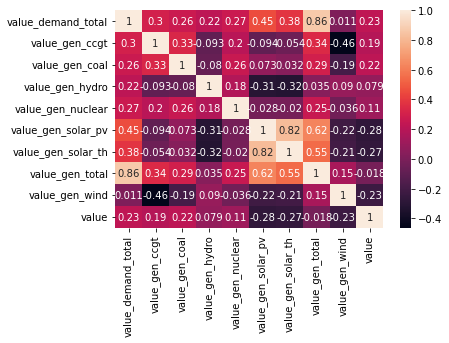

In [30]:
sns.heatmap(df.corr(), annot=True)

In [31]:
df['month'] = df['datetime_utc'].dt.month
df['year'] = df['datetime_utc'].dt.year
df['day_of_week'] = df['datetime_utc'].dt.day_of_week

In [32]:
df.head()

,datetime_utc,value_demand_total,value_gen_ccgt,value_gen_coal,value_gen_hydro,value_gen_nuclear,value_gen_solar_pv,value_gen_solar_th,value_gen_total,value_gen_wind,value,month,year,day_of_week
0,2021-12-31 23:00:00+00:00,20955.3,NaN,900.5,2418.5,6087.5,77.3,10.0,19553.3,7061.7,145.86,12,2021,4
1,2022-01-01 00:00:00+00:00,20165.8,NaN,852.5,2289.4,6089.4,5.2,10.0,19307.5,7075.1,114.90,1,2022,5
2,2022-01-01 01:00:00+00:00,18812.4,NaN,851.5,2008.4,6088.5,5.2,10.0,18964.5,7038.7,113.87,1,2022,5
3,2022-01-01 02:00:00+00:00,17646.4,NaN,851.5,1742.1,6087.5,5.2,10.0,18545.9,6959.8,97.80,1,2022,5
4,2022-01-01 03:00:00+00:00,17018.1,NaN,851.5,1734.1,6088.5,5.2,10.0,18385.3,6794.9,97.80,1,2022,5


<AxesSubplot:xlabel='month'>

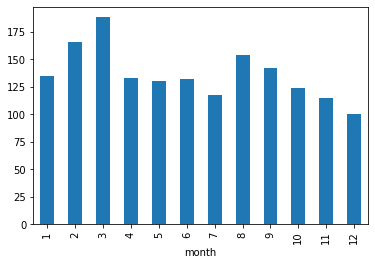

In [33]:
df.groupby('month').mean()['value'].plot(kind='bar')

<AxesSubplot:xlabel='year'>

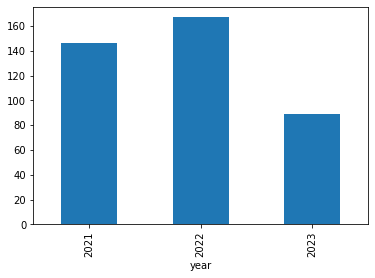

In [34]:
df.groupby('year').mean()['value'].plot(kind='bar')

<AxesSubplot:xlabel='day_of_week'>

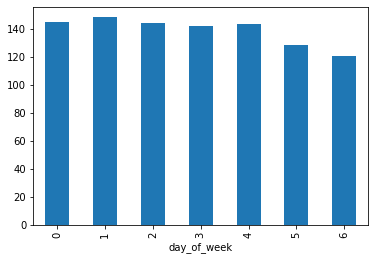

In [35]:
df.groupby('day_of_week').mean()['value'].plot(kind='bar')

In [36]:
df['hour'] = df['datetime_utc'].dt.hour

<AxesSubplot:xlabel='hour'>

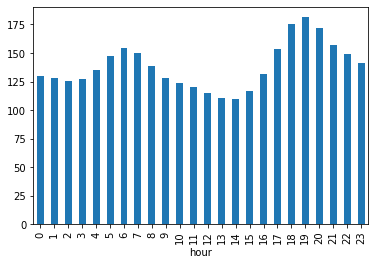

In [37]:
df.groupby('hour').mean()['value'].plot(kind='bar')

In [38]:
df = df.drop(columns=['month','year','day_of_week','hour'])

In [39]:
df.isna().sum()

datetime_utc             0
value_demand_total       0
value_gen_ccgt        2393
value_gen_coal        5988
value_gen_hydro          0
value_gen_nuclear        0
value_gen_solar_pv       0
value_gen_solar_th    1007
value_gen_total          0
value_gen_wind           0
value                 1158
dtype: int64

In [40]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
vars_with_na

['value_gen_ccgt', 'value_gen_coal', 'value_gen_solar_th', 'value']

In [41]:
for var in vars_with_na:
    df[var] = df[var].interpolate(method='nearest')

df[vars_with_na].isnull().sum()

# technically should only fillna or interpolate after train-test split but whatever

value_gen_ccgt         24
value_gen_coal          0
value_gen_solar_th      0
value                 744
dtype: int64

In [42]:
for var in vars_with_na:
    df[var] = df[var].fillna(0)

df[vars_with_na].isnull().sum()

value_gen_ccgt        0
value_gen_coal        0
value_gen_solar_th    0
value                 0
dtype: int64

In [43]:
df['month'] = df['datetime_utc'].dt.month
df['year'] = df['datetime_utc'].dt.year
df['day_of_week'] = df['datetime_utc'].dt.day_of_week
df['hour'] = df['datetime_utc'].dt.hour

# come back to do the rolling avg

In [44]:
df['value_gen_ccgt_coal'] = df['value_gen_ccgt'] + df['value_gen_coal']
df['value_gen_wind_solar_pv_solar_th'] = df['value_gen_wind'] + df['value_gen_solar_pv'] + df['value_gen_solar_th']

In [45]:
df.corr()['value'].sort_values()

year                               -0.575020
value_gen_wind_solar_pv_solar_th   -0.378223
value_gen_solar_pv                 -0.276890
value_gen_solar_th                 -0.259063
month                              -0.243185
value_gen_wind                     -0.185220
day_of_week                        -0.104409
value_gen_total                    -0.013580
value_gen_nuclear                   0.053547
hour                                0.096706
value_gen_hydro                     0.114904
value_demand_total                  0.192914
value_gen_ccgt                      0.315925
value_gen_ccgt_coal                 0.354086
value_gen_coal                      0.523301
value                               1.000000
Name: value, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [47]:
X = df.drop(columns=['value','datetime_utc'])
y = df['value']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(X_train, y_train)

pred = lr.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(
    mean_squared_error(y_train, pred)))
print('train rmse: {}'.format(
    mean_squared_error(y_train, pred, squared=False)))
print('train r2: {}'.format(
    r2_score(y_train, pred)))
print()

# make predictions for test set
pred = lr.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(
    mean_squared_error(y_test, pred)))
print('test rmse: {}'.format(
    mean_squared_error(y_test, pred, squared=False)))
print('test r2: {}'.format(
    r2_score(y_test, pred)))
print()

print('Average price: ', int(y_train.mean()))

train mse: 1491.063405378731
train rmse: 38.61429017059269
train r2: 0.7405787627794291

test mse: 1691.7628796665754
test rmse: 41.13104520513156
test r2: 0.720633264031753

Average price:  131


In [51]:
lasso = Lasso(random_state=1234, max_iter=10000)

In [52]:
param_grid = {'alpha':[0.0001,0.001,0.01,0.1]}

In [53]:
grid = GridSearchCV(lasso,param_grid)

In [54]:
grid.fit(X_train,y_train)

/Users/youssefawad/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e+06, tolerance: 5.372e+03
  model = cd_fast.enet_coordinate_descent(
/Users/youssefawad/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.121e+06, tolerance: 5.332e+03
  model = cd_fast.enet_coordinate_descent(
/Users/youssefawad/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

GridSearchCV(estimator=Lasso(max_iter=10000, random_state=1234),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]})

In [55]:
pred = grid.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(
    mean_squared_error(y_train, pred)))
print('train rmse: {}'.format(
    mean_squared_error(y_train, pred, squared=False)))
print('train r2: {}'.format(
    r2_score(y_train, pred)))
print()

# make predictions for test set
pred = grid.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(
    mean_squared_error(y_test, pred)))
print('test rmse: {}'.format(
    mean_squared_error(y_test, pred, squared=False)))
print('test r2: {}'.format(
    r2_score(y_test, pred)))
print()

print('Average price: ', int(y_train.mean()))

train mse: 1491.0557282210143
train rmse: 38.614190762218676
train r2: 0.740580098482355

test mse: 1691.8666207717247
test rmse: 41.13230629045404
test r2: 0.7206161328993232

Average price:  131


In [56]:
rfr = RandomForestRegressor(random_state=1234)

In [57]:
param_grid = {'n_estimators':[50,100,150], 'max_depth':[2,3,4], 'criterion':['squared_error','friedman_mse']}

In [58]:
grid = GridSearchCV(rfr,param_grid)

In [59]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=1234),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150]})

In [60]:
pred = grid.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(
    mean_squared_error(y_train, pred)))
print('train rmse: {}'.format(
    mean_squared_error(y_train, pred, squared=False)))
print('train r2: {}'.format(
    r2_score(y_train, pred)))
print()

# make predictions for test set
pred = grid.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(
    mean_squared_error(y_test, pred)))
print('test rmse: {}'.format(
    mean_squared_error(y_test, pred, squared=False)))
print('test r2: {}'.format(
    r2_score(y_test, pred)))
print()

print('Average price: ', int(y_train.mean()))

train mse: 1523.3376231258296
train rmse: 39.02995802106159
train r2: 0.7349635639434333

test mse: 1567.0973086407066
test rmse: 39.58657990583055
test r2: 0.7412197268769354

Average price:  131


try to look for outliers per feature; see if standardization needed to reduce variance b/w features or normalization for skewed features
